# ESTI019 - Codificação de Sinais Multimídia
# Lab8 - Codificação de Áudio com ffmpeg
## Profs. Celso S. Kurashima e Mário Minami

Objetivos:
<ul>
<li> Conhecer as opções de codificação do ffmpeg </li>
<li> Verificar várias taxas mpeg 1, camada 3 e conversão entre codecs </li>
<li> Variação de tempo </li>
</ul>

Arquivo .wav full

In [32]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import math

In [33]:
%%bash
wget -q https://github.com/JohnGarrido/ESTI019/blob/main/lab_8/abba0__320k.wav?raw=true
mv abba0__320k.wav?raw=true abba0__320k.wav

In [34]:
def display_audio(file_path: str) -> None:
  fer , sr = librosa.load(file_path)
  print(type(fer), type(sr))
  print(fer.shape, sr)
  # Player será aberto! AGUARDE até abrir!
  display(IPython.display.Audio(data=fer, rate=sr))

In [35]:
abba320k = 'abba0__320k.wav'
display_audio(abba320k)

<class 'numpy.ndarray'> <class 'int'>
(3041592,) 22050


Espectrograma Original

In [36]:
def render_espectogram(file_path: str) -> None:
  fer , sr = librosa.load(file_path)
  plt.figure(figsize=(20, 5))
  D = librosa.amplitude_to_db(np.abs(librosa.stft(fer)), ref=np.max)
  librosa.display.specshow(D, x_axis='time',y_axis='linear')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Linear-frequency power spectrogram '+ file_path)

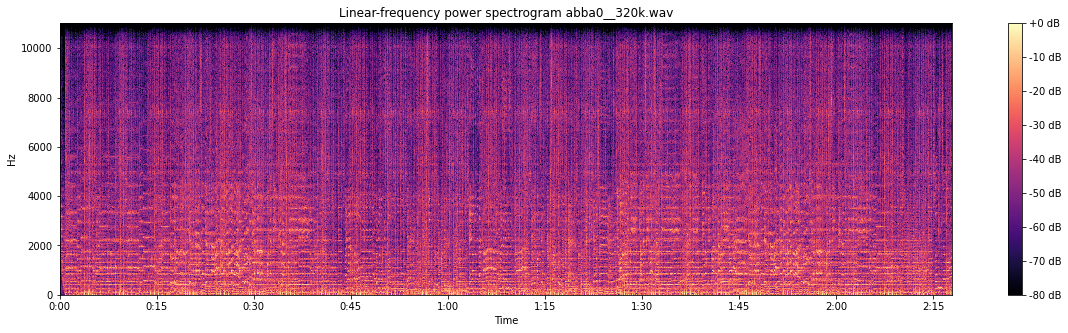

In [37]:
render_espectogram(abba320k)

Verificar os codecs

In [38]:
!ffmpeg -h

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [39]:
!ffmpeg -codecs

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

Conversão wav em mp3, 128kbps

In [ ]:
!ffmpeg -i abba0__320k.wav -codec:a libmp3lame -b:a 128k abba128k.mp3 

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

Áudio e Espectrograma do arquivo codificado

In [ ]:
abba128k = './abba128k.mp3'
display_audio(abba128k)

Espectrograma do Arquivo codificado a 128kbps

In [ ]:
render_espectogram(abba128k)

Codificando a 64kbps

In [ ]:
# Codifcando a 64kbps com logs em nível apenas de erro para diminuir o verbose
!ffmpeg -i abba0__320k.wav -codec:a libmp3lame -b:a 64k abba64k.mp3 -loglevel error

Espectrograma do arquivo a 64kbps

In [ ]:
abba64k = './abba64k.mp3'
render_espectogram(abba64k)

Audio do arquivo

In [ ]:
abba64k = 'abba64k.mp3'
display_audio(abba64k)

Conversão de Codecs

In [ ]:
# Conversão de codecs a 128kbps com logs em nível apenas de erro para diminuir o verbose
!ffmpeg -i abba128k.mp3 -c:a libvorbis abba128k.ogg -loglevel error

In [ ]:
!ls -l

Faça o procedimento para mais três taxas, 32k, 16k e 8kbps.


In [ ]:
# Codifcando a 32k, 16k e 8kbps com logs em nível apenas de erro para diminuir o verbose
%%bash 
ffmpeg -i abba0__320k.wav -codec:a libmp3lame -b:a 32k abba32k.mp3 -loglevel error
ffmpeg -i abba0__320k.wav -codec:a libmp3lame -b:a 16k abba16k.mp3 -loglevel error
ffmpeg -i abba0__320k.wav -codec:a libmp3lame -b:a 8k abba8k.mp3 -loglevel error

Alterando a velocidade

In [ ]:
!ffmpeg -i abba128k.mp3 -filter:a "atempo=2.0" -vn abba128k_v2.mp3 -loglevel error

Audio v2

In [ ]:
abba128k_2 = './abba128k_v2.mp3'
display_audio(abba128k_2)

Mude para um tempo mais lento

In [ ]:
!ffmpeg -i abba128k.mp3 -filter:a "atempo=0.75" -vn abba128k_v075.mp3 -loglevel error

In [ ]:
abba128k_075 = './abba128k_v075.mp3'
display_audio(abba128k_075)

# Repita todos os passos para um arquivo de áudio original de preferência de um CD, mas ao invés da opção codificação com taxa fixa (-b:a), use -q:a N (com N um número de 0 a 9), de 320 a 65kbps.

**Carregando o Arquivo de Áudio**

In [ ]:
%%bash
wget -q https://github.com/JohnGarrido/ESTI019/blob/main/lab_8/kisskiss.mp3?raw=true
mv kisskiss.mp3?raw=true kisskiss.mp3

**Display do Arquivo Original**

In [ ]:
kisskiss = 'kisskiss.mp3'
display_audio(kisskiss)

**Espectograma do Áudio Original**

In [ ]:
render_espectogram(kisskiss)

**Codificando o arquivo (-q:a N)**

In [ ]:
!ffmpeg -i kisskiss.mp3 -codec:a libmp3lame -q:a 2 kisskiss_q2.mp3 -loglevel error

**Display do Arquivo Codificado (-q:a N=2)**

In [ ]:
kisskiss_q2 = 'kisskiss_q2.mp3'
display_audio(kisskiss_q2)

**Espectograma do Áudio Codificado**

In [ ]:
render_espectogram(kisskiss_q2)

**Reduzindo a Velocidade do Áudio Original**

In [ ]:
!ffmpeg -i kisskiss.mp3 -filter:a "atempo=0.75" -vn kisskiss_v075.mp3 -loglevel error

In [ ]:
kisskiss_v075 = "kisskiss_v075.mp3"
display_audio(kisskiss_v075)

**Aumentando a Velocidade do Áudio Original**

In [ ]:
!ffmpeg -i kisskiss.mp3 -filter:a "atempo=2" -vn kisskiss_v2.mp3 -loglevel error

In [ ]:
kisskiss_v2 = "kisskiss_v2.mp3"
display_audio(kisskiss_v2)

# Relatório
** Compare os espectrogramas e as taxas de compressão nos arquivos gravados.
** Apresente as formas de onda e os espectrogramas para os arquivos com tempo modificados